In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samples = 1000

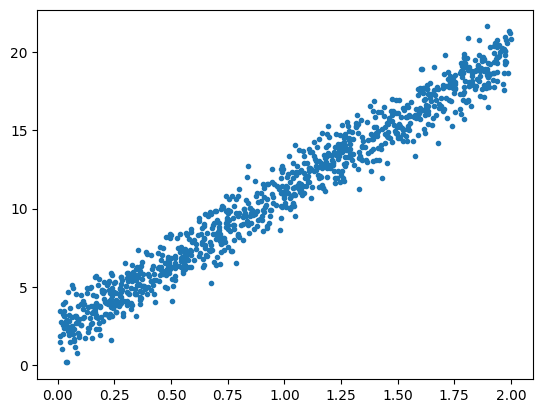

In [13]:

np.random.seed(42)
X = 2*np.random.rand(samples,1)
eps = np.random.normal(0,1, size = (samples,1))

y = 2 + 9 * X+eps

plt.plot(X,y, '.');

In [15]:
X = np.c_[np.ones(samples), X]
X[:5].shape

(5, 2)

### Train/test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_train.shape, y_train.shape, y_test.shape

((670, 2), (670, 2), (670, 1), (330, 1))

### Batch gradient descent

In [29]:
np.random.seed(42)

def gradient_descent(X,y, learning_Rate = .1, epochs = 100):
    m = len(X)
    theta = np.random.rand(X.shape[1],1) #[Beta_0 Beta_1]

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -=  learning_Rate*gradient # elarning rate is  ETA in theory
        return theta
theta = gradient_descent(X_train, y_train)
theta.reshape(-1) # throws away additional dimensions

array([[2.31627302],
       [3.41639074]])

In [35]:
steps = range(1, 200, 1)
thetas = np.array([gradient_descent(X_train, y_train, epochs = epoch,).reshape(-1) for epoch in steps])

thetas.shape

(199, 2)

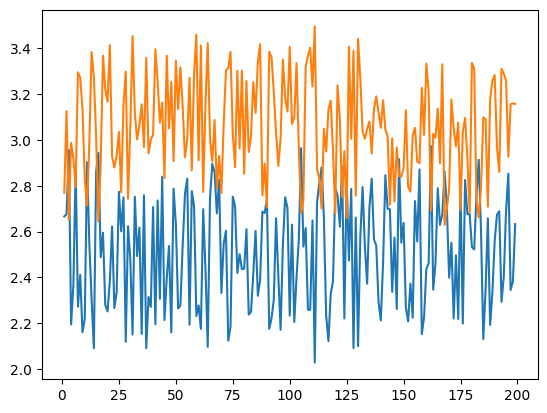

In [39]:
fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas);   